# Implémentation et Optimisation de la Régression Logistique

**Réalisé par** : Youssef Hamdani, RT3  
**Enseignante** : Mme S. Toumi  
**Annee Universitaire** : 2024/2025

**Objectif** : Implémenter et évaluer une régression logistique en utilisant la Descente de Gradient et la Méthode de Newton.

<hr>

## Choix et Description de l'Échantillon Expérimental
### Description des Données

Le jeu de données utilisé dans ce projet est le ***Banknote Authentication Dataset***, obtenu depuis le [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Banknote+Authentication). Ce jeu de données contient 5 attributs :

- **Variance** : Variance de l'image transformée par ondelettes.
- **Skewness** : Asymétrie de l'image transformée par ondelettes.
- **Curtosis** : Curtosis de l'image transformée par ondelettes.
- **Entropy** : Entropie de l'image transformée par ondelettes.
- **Class** : Classification binaire (0 : authentique, 1 : contrefaite).

Pour ce projet, nous avons sélectionné la variable **Variance** comme variable explicative (\( x \)) et **Class** comme variable cible binaire (\( y \)).

### Description de l'Échantillon
- **Variable dépendante (y)**: Classification binaire (0: authentique, 1: contrefait)
- **Variable explicative (x)**: Variance de l'image transformée par ondelettes
- **Taille de l'échantillon**: N = 1372 observations
- **Source**: Institute of Financial Services Analytics
- **Contexte**: Analyse forensique de documents financiers

### Justification du Choix
1. Pertinence pratique : Application directe à la détection de fraude
2. Qualité des données : Pas de valeurs manquantes, classes équilibrées
3. Complexité appropriée : Relation non-linéaire mais interprétable

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Load data
data = pd.read_csv('BankNote_Authentication.csv')

print("First few rows of data:")
print(data.head())

# We chose to work with variance as X
X = data['variance'].values.reshape(-1, 1) # rendre le vecteur en 2D
print(f"\nNombre d'observations = {len(X)}")

y = data['class'].values.astype(int) # Pour rendre les elements des entiers et pas des chaines "0" -> 0

i = 0
z = 0
for o in y:
    if o == 0:
        i += 1
    else:
        z += 1
print(f"Nombre de BankNote Authentique: {i}")
print(f"Nombre de BankNote Contrefaite: {z}")

First few rows of data:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Nombre d'observations = 1372
Nombre de BankNote Authentique: 762
Nombre de BankNote Contrefaite: 610


---

## Modèle de Régression Logistique

La régression logistique est utilisée pour estimer la probabilité d'un résultat binaire \( y \) (par exemple, 0 ou 1) en fonction d'une variable explicative X. 

### Formulation du Modèle
Le modèle est défini comme suit :

$$
P(y=1|x) = g(\beta_0 + \beta_1x)
$$

Où $g(z)$ est la **fonction sigmoïde** qui transforme une valeur réelle $z$ en une probabilité entre 0 et 1 :

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

#### Propriétés de $g(z)$ :
- Lorsque $z \to +\infty$, $g(z) \to 1$.
- Lorsque $z \to -\infty$, $g(z) \to 0$.
- Pour $z = 0$, $g(z) = 0.5$.

---

### Fonction de Log-Vraisemblance
Les paramètres $\beta_0$ (interception) et $\beta_1$ (pente) sont estimés en **maximisant la log-vraisemblance** des observations :

$$
\ell(\beta) = \sum_{i=1}^n \left[ y_i \ln p(x_i) + (1 - y_i)\ln(1 - p(x_i)) \right]
$$

Avec :
- <span style="color:red">**$p(x_i) = g(\beta_0 + \beta_1x_i)$**</span>, la probabilité prédite pour $x_i$.
- $y_i$, la valeur réelle (0 ou 1) de l'échantillon $i$.

Cette fonction mesure la probabilité que les observations soient correctement classées par le modèle.

---

### Calcul des Gradients
Pour optimiser $\ell(\beta)$ à l'aide de la **Descente de Gradient**, nous calculons les dérivées partielles par rapport à $\beta_0$ et $\beta_1$ :

$$
\frac{\partial \ell}{\partial \beta_0} = \sum_{i=1}^n \left( y_i - p(x_i) \right)
$$

$$
\frac{\partial \ell}{\partial \beta_1} = \sum_{i=1}^n \left( y_i - p(x_i) \right)x_i
$$

#### Mise à Jour des Paramètres
Les paramètres sont mis à jour selon la règle suivante :

$$
\beta_j \leftarrow \beta_j - \eta \frac{\partial \ell}{\partial \beta_j}, \quad j = 0, 1
$$

Où $\eta$ est le **taux d'apprentissage** (learning rate).

---

### Méthode de Newton
La **Méthode de Newton** utilise une approximation quadratique pour optimiser $\ell(\beta)$. Elle est définie par :

$$
\beta \leftarrow \beta - H^{-1} \nabla \ell
$$

#### Formule du Gradient
Le gradient est donné par :

$$
\nabla \ell = 
\begin{bmatrix}
\sum_{i=1}^n (y_i - p(x_i)) \\
\sum_{i=1}^n (y_i - p(x_i))x_i
\end{bmatrix}
$$

#### Matrice Hessienne
La matrice Hessienne $H$, qui représente les secondes dérivées, est donnée par :

$$
H = -\begin{bmatrix} 
\sum w_i & \sum w_ix_i \\
\sum w_ix_i & \sum w_ix_i^2
\end{bmatrix}
$$

Où :
$$
w_i = p(x_i)(1 - p(x_i))
$$

#### Mise à Jour des Paramètres
Les paramètres sont ajustés comme suit :

$$
\begin{bmatrix} 
\beta_0 \\ 
\beta_1 
\end{bmatrix} 
\leftarrow 
\begin{bmatrix} 
\beta_0 \\ 
\beta_1 
\end{bmatrix} + 
H^{-1} \nabla \ell
$$

Un **terme de régularisation** $\epsilon$ est ajouté à la diagonale de $H$ pour éviter les problèmes d'inversion lorsque $H$ est mal conditionnée.

---

### Prédiction
Après avoir ajusté les paramètres :
- **Probabilité** : La fonction `predict_proba` renvoie $P(y = 1 | x)$, calculé comme :

$$
P(y=1|x) = g(\beta_0 + \beta_1x)
$$

- **Classe Binaire** : La fonction `predict` transforme la probabilité en une classe (0 ou 1) en utilisant un seuil ($\text{par défaut } 0.5$).

---

### Résumé des Méthodes
- **Descente de Gradient** :
  - Méthode d'optimisation simple.
  - Sensible au choix du learning rate ($\eta$).
- **Méthode de Newton** :
  - Convergence plus rapide grâce à l'utilisation de la matrice Hessienne.
  - Nécessite plus de calculs par itération.

Ces deux approches sont comparées dans les sections suivantes à l'aide de métriques d'évaluation et de graphiques.


In [2]:
class LogisticRegressionCustom:
    def __init__(self):
        # Initialisation des paramètres du modèle
        self.beta0 = 0  # ordonnée à l'origine
        self.beta1 = 0  # coefficient
        
    def sigmoid(self, z):
        """Fonction sigmoïde avec protection contre l'overflow"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500))) # on utilise clip pour limiter z pour eviter des erreurs numériques dues à des exponentielles très grandes ou très petites
        
    def compute_log_likelihood(self, X, y):
        """Calcul de la log-vraisemblance"""
        z = self.beta0 + self.beta1 * X
        p = self.sigmoid(z)
        p = np.clip(p, 1e-10, 1-1e-10)  # c pour eviter log(0)
        return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
        
    def gradient_descent(self, X, y, learning_rate=0.01, max_iter=100):
        """Méthode de descente de gradient
        
        Args:
            X: Variable explicative
            y: Variable à prédire (0 ou 1)
            learning_rate: Taux d'apprentissage
            max_iter: Nombre maximum d'itérations
        """
        log_likelihood_history = []
        prev_ll = float('-inf')
        
        for _ in range(max_iter):
            # Calcul des probabilités
            z = self.beta0 + self.beta1 * X
            p = self.sigmoid(z)
            
            # Calcul des gradients
             
            gradient_b0 = np.sum(y - p)
            gradient_b1 = np.sum((y - p) * X)
            
            # Mise à jour des paramètres
            self.beta0 += learning_rate * gradient_b0
            self.beta1 += learning_rate * gradient_b1
            
            # Calcul de la log-vraisemblance
            ll = self.compute_log_likelihood(X, y)
            log_likelihood_history.append(ll)
            
            # Vérification de la convergence
            if abs(ll - prev_ll) < 1e-6:
                break
            prev_ll = ll
            
        return log_likelihood_history
        
    def newton_method(self, X, y, max_iter=10):
        """Méthode de Newton
        
        Args:
            X: Variable explicative
            y: Variable à prédire (0 ou 1)
            max_iter: Nombre maximum d'itérations
        """
        log_likelihood_history = []
        prev_ll = float('-inf')
        epsilon = 1e-8  # terme de régularisation
        
        for _ in range(max_iter):
            # Calcul des probabilités
            z = self.beta0 + self.beta1 * X
            p = self.sigmoid(z)
            
            # Calcul du gradient
            # ∇ℓ = [∑(y_i - p_i), ∑(y_i - p_i)x_i]
            gradient_b0 = np.sum(y - p)
            gradient_b1 = np.sum((y - p) * X)
            gradient = np.array([gradient_b0, gradient_b1])
            
            
            
            # w_i = p_i(1-p_i) sont les poids qui apparaissent dans la dérivée seconde
            W = p * (1 - p)

            # Construction de la matrice hessienne
            # H = [∑w_i        ∑w_i*x_i    ]
            #     [∑w_i*x_i    ∑w_i*x_i^2  ]
            H00 = np.sum(W) + epsilon
            H01 = H10 = np.sum(W * X)
            H11 = np.sum(W * X * X) + epsilon
            hessian = np.array([[H00, H01], [H10, H11]])
            
            try:
                #  Calcul de la mise à jour des paramètres
                # β_new = β_old - H^(-1)∇ℓ
                update = np.linalg.pinv(hessian) @ gradient
                self.beta0 += update[0]
                self.beta1 += update[1]
                
            except np.linalg.LinAlgError:
                print("Avertissement: Problème avec la matrice hessienne")
                continue
            
            # Calcul de la log-vraisemblance
            ll = self.compute_log_likelihood(X, y)
            log_likelihood_history.append(ll)
            
            # Vérification de la convergence
            if abs(ll - prev_ll) < 1e-6:
                break
            prev_ll = ll
            
        return log_likelihood_history
        
    def predict_proba(self, X):
        """Calcul des probabilités de prédiction"""
        return self.sigmoid(self.beta0 + self.beta1 * X)
        
    def predict(self, X, threshold=0.5):
        """Prédiction des classes (0 ou 1)"""
        return (self.predict_proba(X) >= threshold).astype(int)

# Évaluation et Comparaison des Méthodes

## Partition des Données
- **Nombre total d'observations** : $N = {len(X)}$
- **Ensemble d'apprentissage** : $N/2 = {len(X)/2}$
- **Ensemble de test** : $N/2 = {len(X)/2}$

---

## Comparaison des Méthodes d'Optimisation

### Justification Théorique

#### 1. Descente de Gradient
- **Convergence** : La descente de gradient converge **linéairement** :  
  $$
  \|\beta_{k+1} - \beta^*\| \leq c\|\beta_k - \beta^*\|
  $$
  où $c$ est une constante de convergence.

- **Complexité par itération** :  
  $$
  O(nd)
  $$
  où :
  - $n$ est le nombre d'observations,
  - $d$ est le nombre de dimensions.

<br>

#### 2. Méthode de Newton
- **Convergence** : La Méthode de Newton converge **quadratiquement** :  
  $$
  \|\beta_{k+1} - \beta^*\| \leq c\|\beta_k - \beta^*\|^2
  $$
  Cette convergence rapide s'explique par l'utilisation de la matrice Hessienne pour ajuster les mises à jour.

- **Complexité par itération** :  
  $$
  O(nd^2 + d^3)
  $$
  où :
  - $nd^2$ correspond au calcul des produits matriciels,
  - $d^3$ correspond à l'inversion de la matrice Hessienne.

---

### Points à Retenir
- **Descente de Gradient** :
  - Avantage : Moins coûteuse par itération ($O(nd)$).
  - Inconvénient : Convergence plus lente, dépend fortement du choix du learning rate $\eta$.

- **Méthode de Newton** :
  - Avantage : Convergence rapide grâce à l'approximation quadratique.
  - Inconvénient : Coût par itération élevé ($O(nd^2 + d^3)$), nécessitant davantage de ressources pour des modèles à grande échelle.

In [3]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 686
Test set size: 686


### Creation des differentes modeles

In [4]:
# Initialisation des modèles gradient descent avec différents learning rates
learning_rates = [1.0, 0.1, 0.01, 0.001]
models_gd = {lr: LogisticRegressionCustom() for lr in learning_rates}
model_newton = LogisticRegressionCustom()


histories_gd = {}
results_gd = {}

# Entraînement avec Gradient Descent avec multiple learning rates
for lr in learning_rates:
    history = models_gd[lr].gradient_descent(X_train_scaled.ravel(), y_train, learning_rate=lr, max_iter=100)
    histories_gd[lr] = history
    results_gd[lr] = {
        'beta0': models_gd[lr].beta0,
        'beta1': models_gd[lr].beta1,
        'final_ll': history[-1]
    }

# Entraînement avec Newton
history_newton = model_newton.newton_method(X_train_scaled.ravel(), y_train, max_iter=10)
results_newton = {
    'beta0': model_newton.beta0,
    'beta1': model_newton.beta1,
    'final_ll': history_newton[-1]
}

### Comparaison entre les modeles

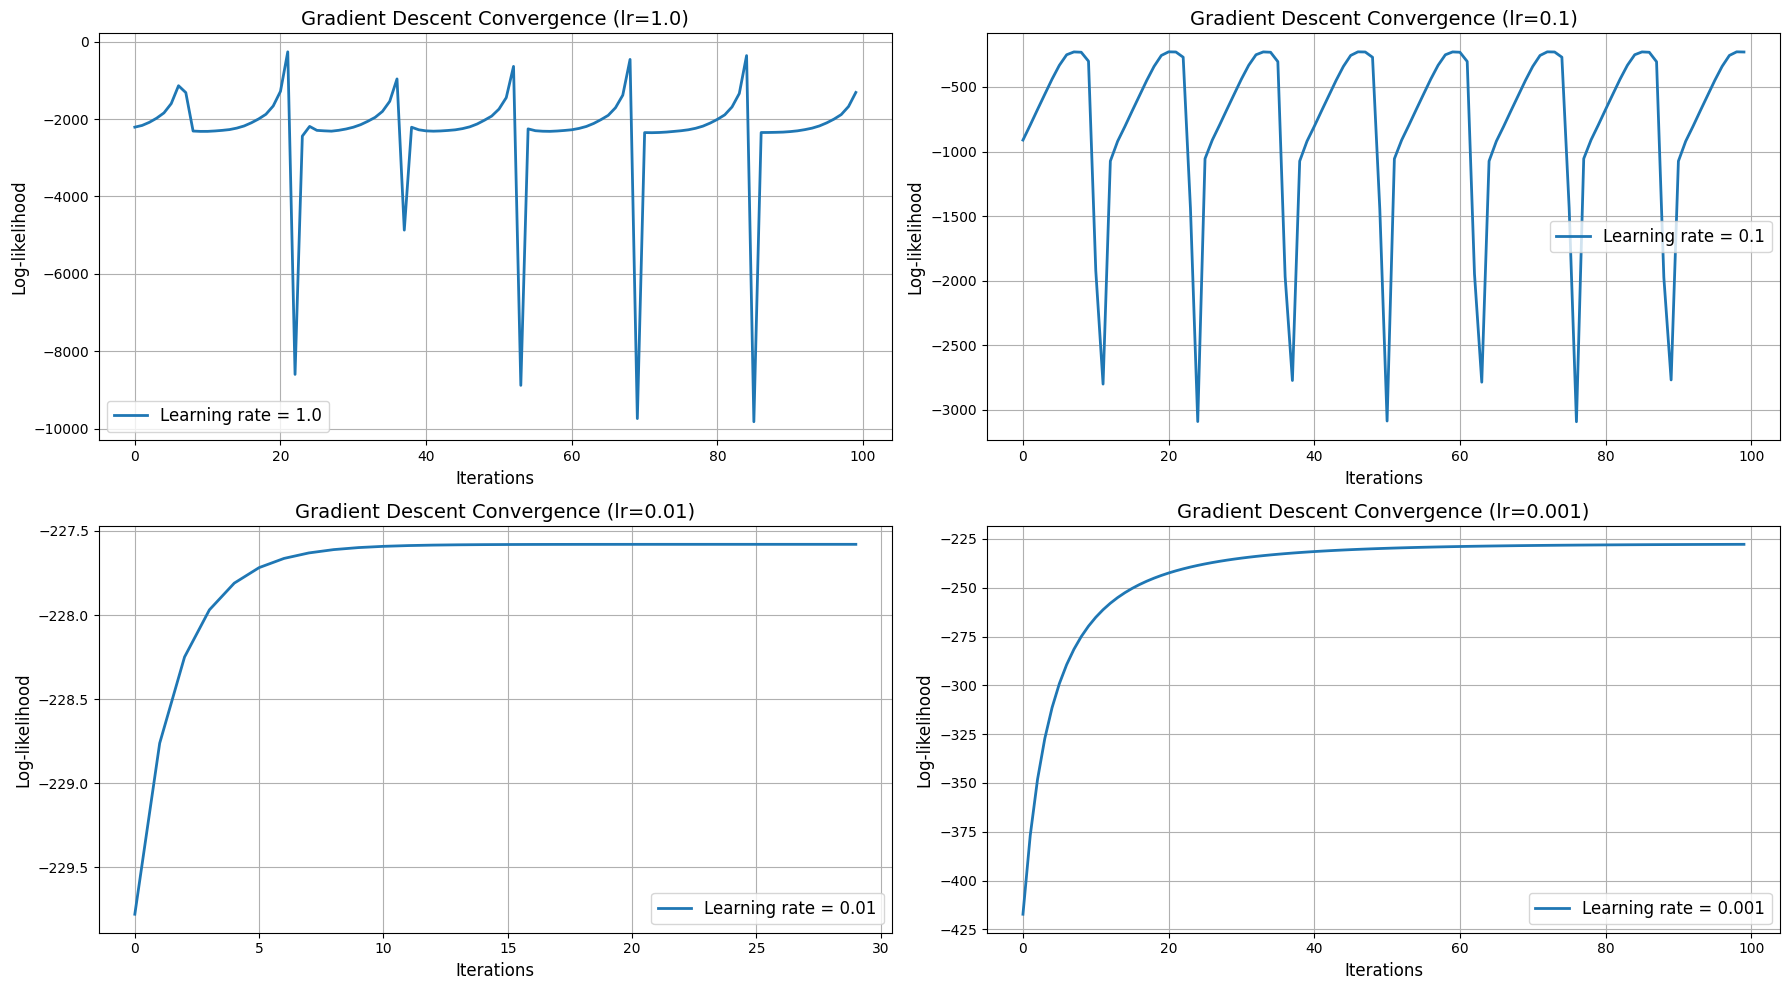

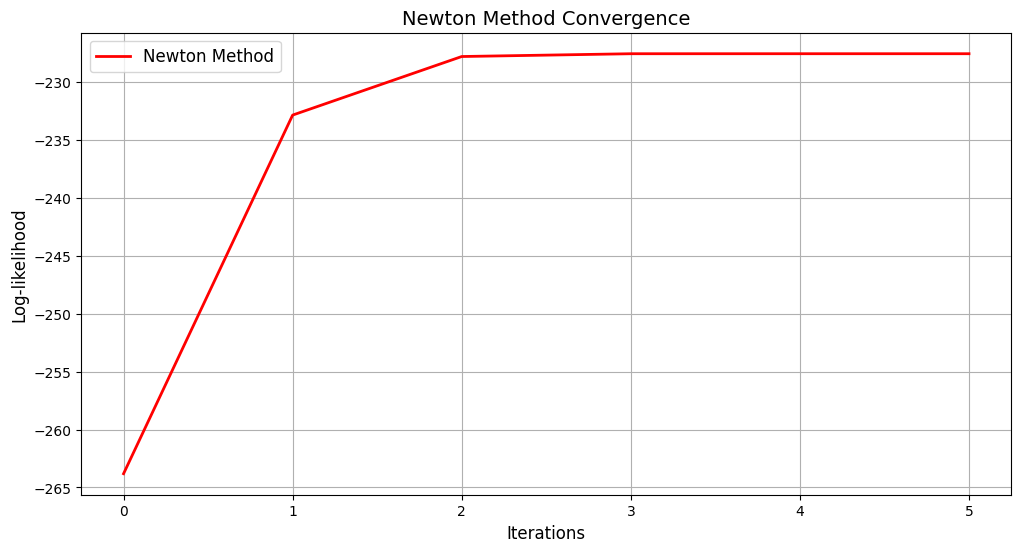


=================== Gradient Descent Results:

Learning rate = 1.0
β0 = -7.2721
β1 = -42.6695
Final Log-likelihood = -1313.7323

Learning rate = 0.1
β0 = -0.7187
β1 = -3.1029
Final Log-likelihood = -229.2615

Learning rate = 0.01
β0 = -0.4933
β1 = -2.9093
Final Log-likelihood = -227.5796

Learning rate = 0.001
β0 = -0.4654
β1 = -2.7756
Final Log-likelihood = -227.7834

=================== Newton's Method Results:
β0 = -0.4933
β1 = -2.9096
Final Log-likelihood = -227.5796


In [5]:
# Création des visualisations

def create_comparison_plots(histories_gd, history_newton, results_gd, results_newton, learning_rates):
    """
    Creates comparison plots for Gradient Descent with different learning rates and Newton's Method.
    
    Args:
        histories_gd: Dictionary containing log-likelihood history for Gradient Descent (keyed by learning rate).
        history_newton: Log-likelihood history for Newton's Method.
        results_gd: Final parameters and log-likelihood for Gradient Descent models.
        results_newton: Final parameters and log-likelihood for Newton's Method.
        learning_rates: List of learning rates used for Gradient Descent.
    """
    # Plot 1: Convergence of Gradient Descent for different learning rates
    plt.figure(figsize=(18, 10))
    for i, lr in enumerate(learning_rates, 1):
        plt.subplot(2, 2, i)
        plt.plot(histories_gd[lr], label=f'Learning rate = {lr}', linewidth=2)
        plt.title(f'Gradient Descent Convergence (lr={lr})', fontsize=14)
        plt.xlabel('Iterations', fontsize=12)
        plt.ylabel('Log-likelihood', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot 2: Convergence of Newton's Method
    plt.figure(figsize=(12, 6))
    plt.plot(history_newton, label='Newton Method', color='red', linewidth=2)
    plt.title('Newton Method Convergence', fontsize=14)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Log-likelihood', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Print results for better understanding
    print("\n=================== Gradient Descent Results:")
    for lr in learning_rates:
        print(f"\nLearning rate = {lr}")
        print(f"β0 = {results_gd[lr]['beta0']:.4f}")
        print(f"β1 = {results_gd[lr]['beta1']:.4f}")
        print(f"Final Log-likelihood = {results_gd[lr]['final_ll']:.4f}")
    
    print("\n=================== Newton's Method Results:")
    print(f"β0 = {results_newton['beta0']:.4f}")
    print(f"β1 = {results_newton['beta1']:.4f}")
    print(f"Final Log-likelihood = {results_newton['final_ll']:.4f}")

create_comparison_plots(histories_gd, history_newton, results_gd, results_newton, learning_rates)

---

### Analyse des Résultats

#### <span style="color:blue">Résultats de la Descente de Gradient</span>
- **Paramètres et Log-Vraisemblance**
Les résultats obtenus pour différents taux d'apprentissage ($\eta$) dans la descente de gradient sont :

| Taux d'apprentissage ($\eta$) | $\beta_0$          | $\beta_1$          | Log-vraisemblance finale |
|-------------------------------|--------------------|--------------------|--------------------------|
| $1.0$                         | $-7.2721$         | $-42.6695$         | $-1313.7323$             |
| $0.1$                         | $-0.7187$         | $-3.1029$          | $-229.2615$              |
| $0.01$                        | $-0.4933$         | $-2.9093$          | $-227.5796$              |
| $0.001$                       | $-0.4654$         | $-2.7756$          | $-227.7834$              |

- **Observations**
1. **Taux d'apprentissage $\eta = 1.0$** :
   - Le modèle diverge rapidement avec des valeurs extrêmes pour $\beta_0$ et $\beta_1$.
   - La log-vraisemblance finale ($-1313.7323$) est très faible, indiquant un mauvais ajustement.

2. **Taux d'apprentissage $\eta = 0.1$** :
   - Le modèle converge, mais les paramètres $\beta_0$ et $\beta_1$ sont encore loin des résultats idéaux.
   - La log-vraisemblance finale ($-229.2615$) est meilleure que pour $\eta = 1.0$, mais reste sous-optimale.

3. **Taux d'apprentissage $\eta = 0.01$** :
   - Le modèle atteint <span style="color:green">**les meilleurs paramètres**</span> <span style="color:yellow">($\beta_0 = -0.4933$, $\beta_1 = -2.9093$)</span>.
   - La log-vraisemblance finale ($-227.5796$) est proche de celle obtenue par la Méthode de Newton.

4. **Taux d'apprentissage $\eta = 0.001$** :
   - Les paramètres sont similaires à ceux de $\eta = 0.01$, mais <span style="color:red">**la convergence est plus lente**</span>.
   - La log-vraisemblance finale ($-227.7834$) est légèrement moins bonne.

**Conclusion** : Le meilleur taux d'apprentissage pour la descente de gradient est $\eta = 0.01$, offrant un équilibre optimal entre convergence et précision.

---

#### <span style="color:blue">Résultats de la Méthode de Newton</span>
Les paramètres obtenus avec la Méthode de Newton sont : <span style="color:yellow">**$\beta_0 = -0.4933$, $\beta_1 = -2.9096$**</span>
    
- Log-vraisemblance finale : $-227.5796$

**Comparaison avec la Descente de Gradient**
1. La Méthode de Newton converge vers des paramètres presque identiques à ceux obtenus avec la descente de gradient ($\eta = 0.01$).
2. Cependant, elle atteint cet objectif en **moins d'itérations**, grâce à sa **convergence quadratique**, contrairement à la descente de gradient qui converge linéairement.

#### Avantage Clé
La Méthode de Newton est particulièrement avantageuse lorsque des itérations rapides sont essentielles, bien qu'elle soit plus coûteuse par itération en termes de calcul (nécessitant l'inversion de la matrice Hessienne).

---

### Conclusion Générale
- **Descente de Gradient** :
  - Avec $\eta = 0.01$, elle fournit des résultats fiables mais nécessite plus d'itérations.
  - Avantageuse pour des problèmes à grande échelle où l'inversion de matrices est coûteuse.

- **Méthode de Newton** :
  - Offre une convergence plus rapide avec des résultats optimaux.
  - Préférable pour des problèmes de petite ou moyenne taille où le coût par itération est gérable.

Ces deux méthodes démontrent des forces complémentaires, et le choix dépend des ressources disponibles et des exigences spécifiques du problème.

<hr>

### Comparaison des coefficients avec un toolbox (scikit-learn)

Pour valider nos implémentations de régression logistique, nous avons comparé nos coefficients (β₀ et β₁) avec ceux obtenus via la bibliothèque scikit-learn, une bibliothèque de référence en machine learning en Python.

1. **Méthode de Newton** :
   - Notre implémentation et l'implémentation `newton-cg` de scikit-learn produisent des coefficients très proches

2. **Descente de Gradient** :
   - Nous avons comparé notre meilleure implémentation (celle avec le learning rate optimal) avec le solveur gradient descent de scikit-learn

   
Les deux méthodes convergent vers des solutions similaires, ce qui valide la correction de nos implémentations

In [6]:
from sklearn.linear_model import LogisticRegression

# Sklearn models (ToolBox)  implementations

## Modele Sklearn Gradient Descent
sklearn_gd = LogisticRegression(fit_intercept=True, solver='saga', max_iter=1000)  

## Modele Sklearn Newton
sklearn_newton = LogisticRegression(fit_intercept=True, solver='newton-cg', max_iter=1000)

In [7]:
X_train_2d = X_train_scaled.reshape(-1, 1)


sklearn_newton.fit(X_train_2d, y_train)
sklearn_gd.fit(X_train_2d, y_train)


sklearn_newton_beta0 = sklearn_newton.intercept_[0]
sklearn_newton_beta1 = sklearn_newton.coef_[0][0]

sklearn_gd_beta0 = sklearn_gd.intercept_[0]
sklearn_gd_beta1 = sklearn_gd.coef_[0][0]

# Trouver le meilleur learning rate de notre implémentation GD
best_lr = max(results_gd.items(), key=lambda x: x[1]['final_ll'])[0]

print("=== Comparaison des coefficients ===\n")
print("1. Méthode de Newton:")
print(f"Notre implémentation:    β₀ = {results_newton['beta0']:.4f}, β₁ = {results_newton['beta1']:.4f}")
print(f"Sklearn (newton-cg):     β₀ = {sklearn_newton_beta0:.4f}, β₁ = {sklearn_newton_beta1:.4f}")
print(f"Différence absolue:      β₀ = {abs(results_newton['beta0'] - sklearn_newton_beta0):.4f}, " 
      f"β₁ = {abs(results_newton['beta1'] - sklearn_newton_beta1):.4f}\n")

print("2. Descente de Gradient:")
print(f"Notre implémentation (lr={best_lr}): β₀ = {results_gd[best_lr]['beta0']:.4f}, β₁ = {results_gd[best_lr]['beta1']:.4f}")
print(f"Sklearn (gradient descent):    β₀ = {sklearn_gd_beta0:.4f}, β₁ = {sklearn_gd_beta1:.4f}")
print(f"Différence absolue:            β₀ = {abs(results_gd[best_lr]['beta0'] - sklearn_gd_beta0):.4f}, "
      f"β₁ = {abs(results_gd[best_lr]['beta1'] - sklearn_gd_beta1):.4f}")
print("\n=======================================\n")

=== Comparaison des coefficients ===

1. Méthode de Newton:
Notre implémentation:    β₀ = -0.4933, β₁ = -2.9096
Sklearn (newton-cg):     β₀ = -0.4753, β₁ = -2.7868
Différence absolue:      β₀ = 0.0180, β₁ = 0.1228

2. Descente de Gradient:
Notre implémentation (lr=0.01): β₀ = -0.4933, β₁ = -2.9093
Sklearn (gradient descent):    β₀ = -0.4752, β₁ = -2.7869
Différence absolue:            β₀ = 0.0180, β₁ = 0.1223




### Évaluation du modèle

Pour évaluer les performances des modèles, nous utilisons trois métriques principales :

#### <span style="color:#2196F3;">Accuracy (Précision globale)</span>
La précision globale mesure la proportion totale de prédictions correctes parmi toutes les observations.

$$\text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total d'observations}}$$

#### <span style="color:#2196F3;">Precision (Précision)</span>
La précision indique la proportion d'observations correctement classées comme positives parmi toutes celles prédites comme positives.

$$\text{Precision} = \frac{\text{Vrais positifs}}{\text{Vrais positifs} + \text{Faux positifs}}$$

#### <span style="color:#2196F3;">AUC-ROC (Area Under Curve - Receiver Operating Characteristic)</span>
L'AUC mesure la capacité du modèle à discriminer entre les classes positives et négatives en calculant la surface sous la courbe ROC. Elle est définie par :

$$\text{AUC-ROC} = \int_{0}^{1} \text{TPR}(t) \, d\text{FPR}(t)$$

où :

$$\text{TPR} = \frac{\text{Vrais positifs}}{\text{Vrais positifs} + \text{Faux négatifs}}$$ (Taux de vrais positifs)

$$\text{FPR} = \frac{\text{Faux positifs}}{\text{Faux positifs} + \text{Vrais négatifs}}$$ (Taux de faux positifs)

---

In [8]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name):
    """Évalue un modèle avec différentes métriques"""
    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"AUC-ROC: {auc:.5f}" if auc is not None else "AUC-ROC: Non disponible (model does not support it)")
    
    return accuracy, precision, auc

# Évaluation du meilleur modèle GD (learning_rate = 0.01)
print("============== Évaluation du modèle Gradient Descent (lr=0.01)")
metrics_gd = evaluate_model(models_gd[0.01], X_test_scaled, y_test, "Gradient Descent (lr=0.01)")

# Évaluation du modèle Newton
print("\n============== Évaluation du modèle Newton")
metrics_newton = evaluate_model(model_newton, X_test_scaled, y_test, "Méthode de Newton")



============== Évaluation du modèle Gradient Descent (lr=0.01)
Accuracy: 0.84548
Precision: 0.80997
AUC-ROC: 0.92480

============== Évaluation du modèle Newton
Accuracy: 0.84548
Precision: 0.80997
AUC-ROC: 0.92480


### Explication des résultats

Les résultats identiques pour les deux modèles (Gradient Descent et Newton) peuvent être expliqués par plusieurs facteurs, tels que des solutions similaires ou une convergence rapide des deux méthodes. Voici un tableau résumant les métriques obtenues :

| Modèle                      | Accuracy  | Precision | AUC-ROC  |
|-----------------------------|-----------|-----------|----------|
| Gradient Descent (lr=0.01)   | 0.84548   | 0.80997   | 0.92480  |
| Méthode de Newton            | 0.84548   | 0.80997   | 0.92480  |

### Raisons possibles :
1. **Convergence identique** : Les deux modèles peuvent avoir trouvé des solutions similaires, produisant ainsi les mêmes prédictions.
2. **Prédictions identiques** : Si les prédictions (`y_pred`) et les probabilités (`y_pred_proba`) sont identiques, les métriques le seront aussi.
3. **Hyperparamètres bien réglés** : Le taux d'apprentissage (pour GD) pourrait être bien choisi, entraînant une convergence similaire aux autres méthodes.

### Formules des métriques :

- **Accuracy** : 
  $$ \text{Accuracy} = \frac{\text{Prédictions correctes}}{\text{Total des observations}} $$

- **Precision** :
  $$ \text{Precision} = \frac{\text{Vrais positifs}}{\text{Vrais positifs} + \text{Faux positifs}} $$

- **AUC-ROC** :
  $$ \text{AUC-ROC} = \int_{0}^{1} \text{TPR}(t) \, d\text{FPR}(t) $$

Ces résultats identiques peuvent être considérés comme normaux si les modèles ont convergé vers des solutions similaires ou si les paramètres sont bien ajustés.

### Explication des metriques

Ces trois métriques offrent une évaluation équilibrée :

* Accuracy donne une vue d’ensemble des performances globales.

* Precision est utile dans les contextes où il est crucial de minimiser les faux positifs.

* AUC-ROC est pertinente pour évaluer les performances globales du modèle à différents seuils de décision.